In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud=pd.read_csv('my_fraud.csv')

In [3]:
fraud.head()

,clientid_cr,algo_cr,pubclientid_cr,siteId_cr,goalid_cr,ispDimId_cr,osVerDimId_cr,conversion_fraud
0,75694,38,2320,34,6384,280429,199452,1
1,75694,38,15240,178,6384,136127,199452,1
2,75694,21,2320,34,6384,172725,199452,1
3,75694,38,2320,34,6384,136127,199452,1
4,30431,21,1,3296,3370,136127,360833,1


In [5]:
def detect_outlier(data):
    thresold=3
    outlier=[]
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        zscore=(i-mean)/std
        if np.abs(zscore)>thresold:
            outlier.append(i)
    return outlier

In [6]:
clm=fraud.columns

In [7]:
clm

Index(['clientid_cr', 'algo_cr', 'pubclientid_cr', 'siteId_cr', 'goalid_cr',
       'ispDimId_cr', 'osVerDimId_cr', 'conversion_fraud'],
      dtype='object')

In [11]:
for j in clm:
    print(j)
    print(detect_outlier(fraud[j]))

clientid_cr
[30431, 30431, 30431, 30431, 30431, 30431, 30431, 30431, 30431, 30431]
algo_cr
[]
pubclientid_cr
[]
siteId_cr
[]
goalid_cr
[]
ispDimId_cr
[]
osVerDimId_cr
[]
conversion_fraud
[]


c:\users\ujjwal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


In [12]:
normal=pd.read_csv('normal4.csv')

In [13]:
c=normal.columns

In [14]:
c

Index(['Unnamed: 0', 'clientid_cr', 'algo_cr', 'pubclientid_cr', 'siteId_cr',
       'goalid_cr', 'ispDimId_cr', 'osVerDimId_cr', 'conversion_fraud'],
      dtype='object')

In [15]:
for k in c[1:9]:
    print(k)
    print(detect_outlier(normal[k]))

clientid_cr
[]
algo_cr
[]
pubclientid_cr
[]
siteId_cr
[]
goalid_cr
[]
ispDimId_cr
[]
osVerDimId_cr
[]
conversion_fraud
[]


c:\users\ujjwal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


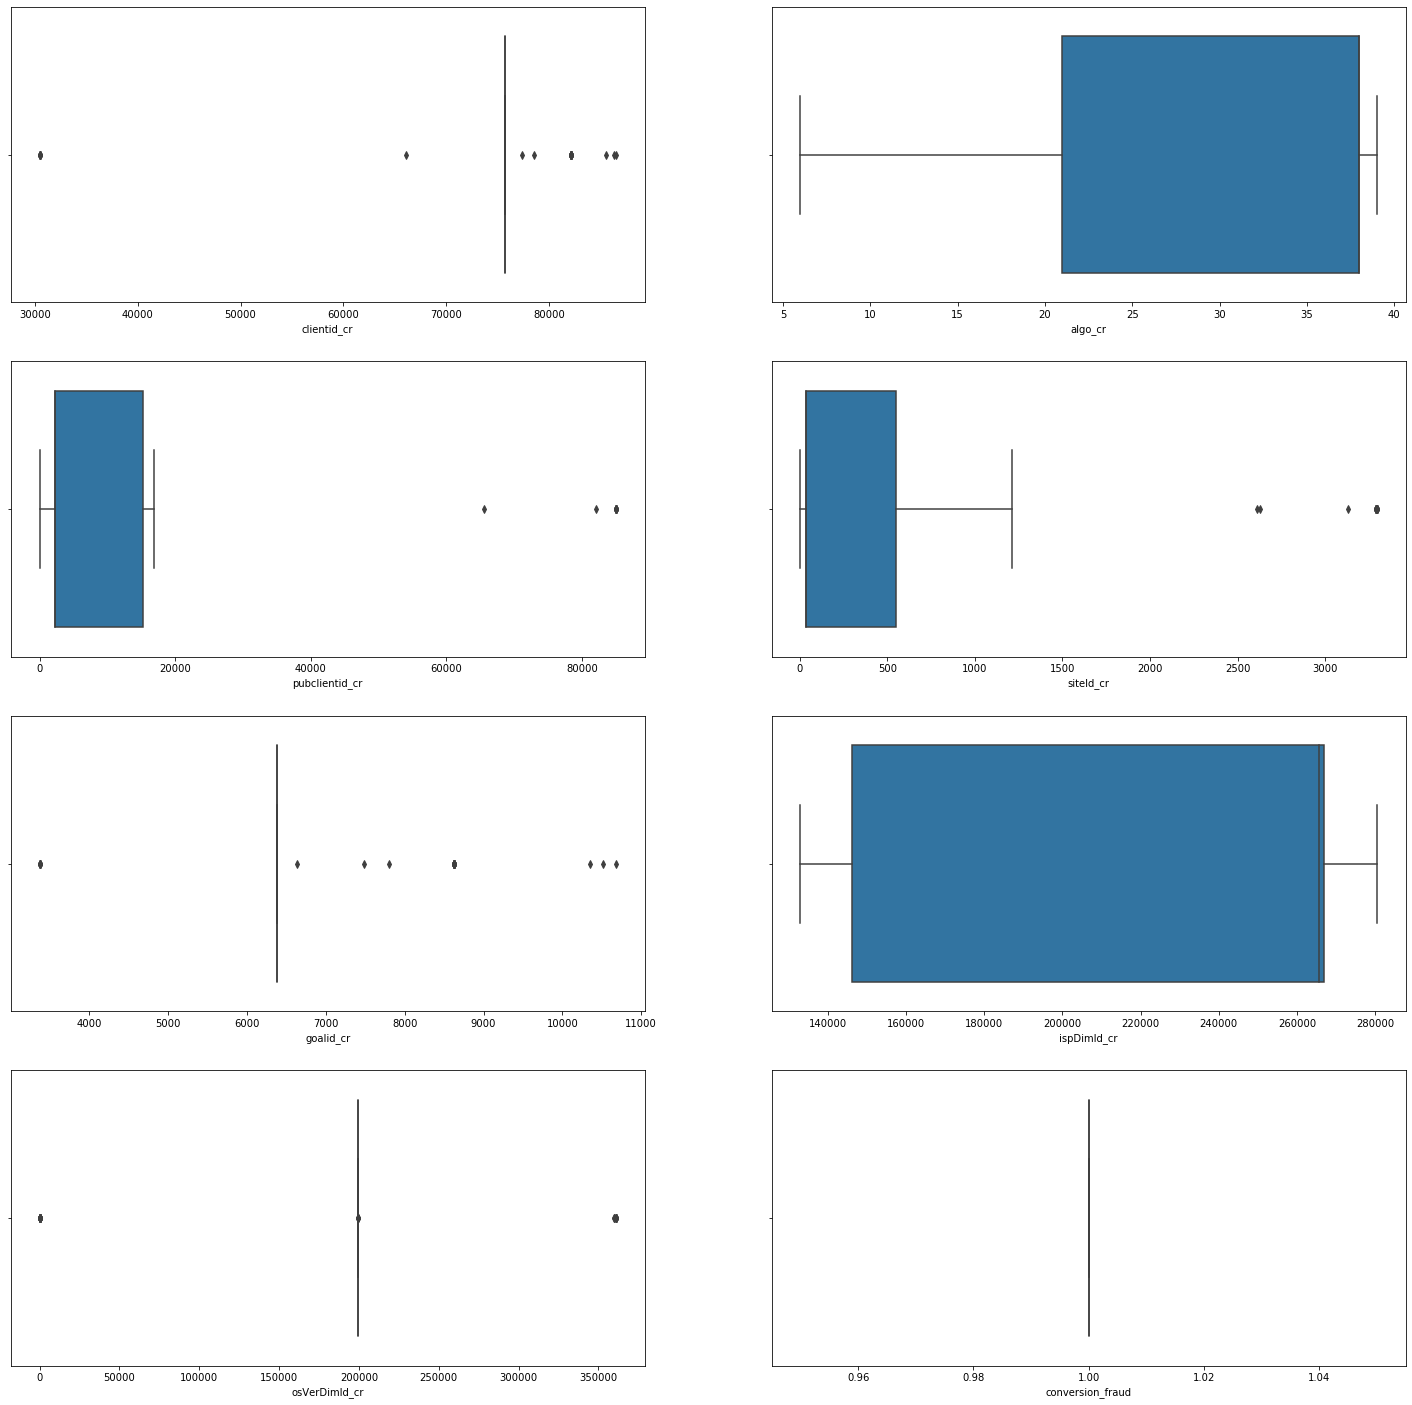

In [17]:
plt.figure(figsize=(25,25))
for n,var in enumerate(clm):
    plt.subplot(4,2,n+1)
    sns.boxplot(fraud[var])

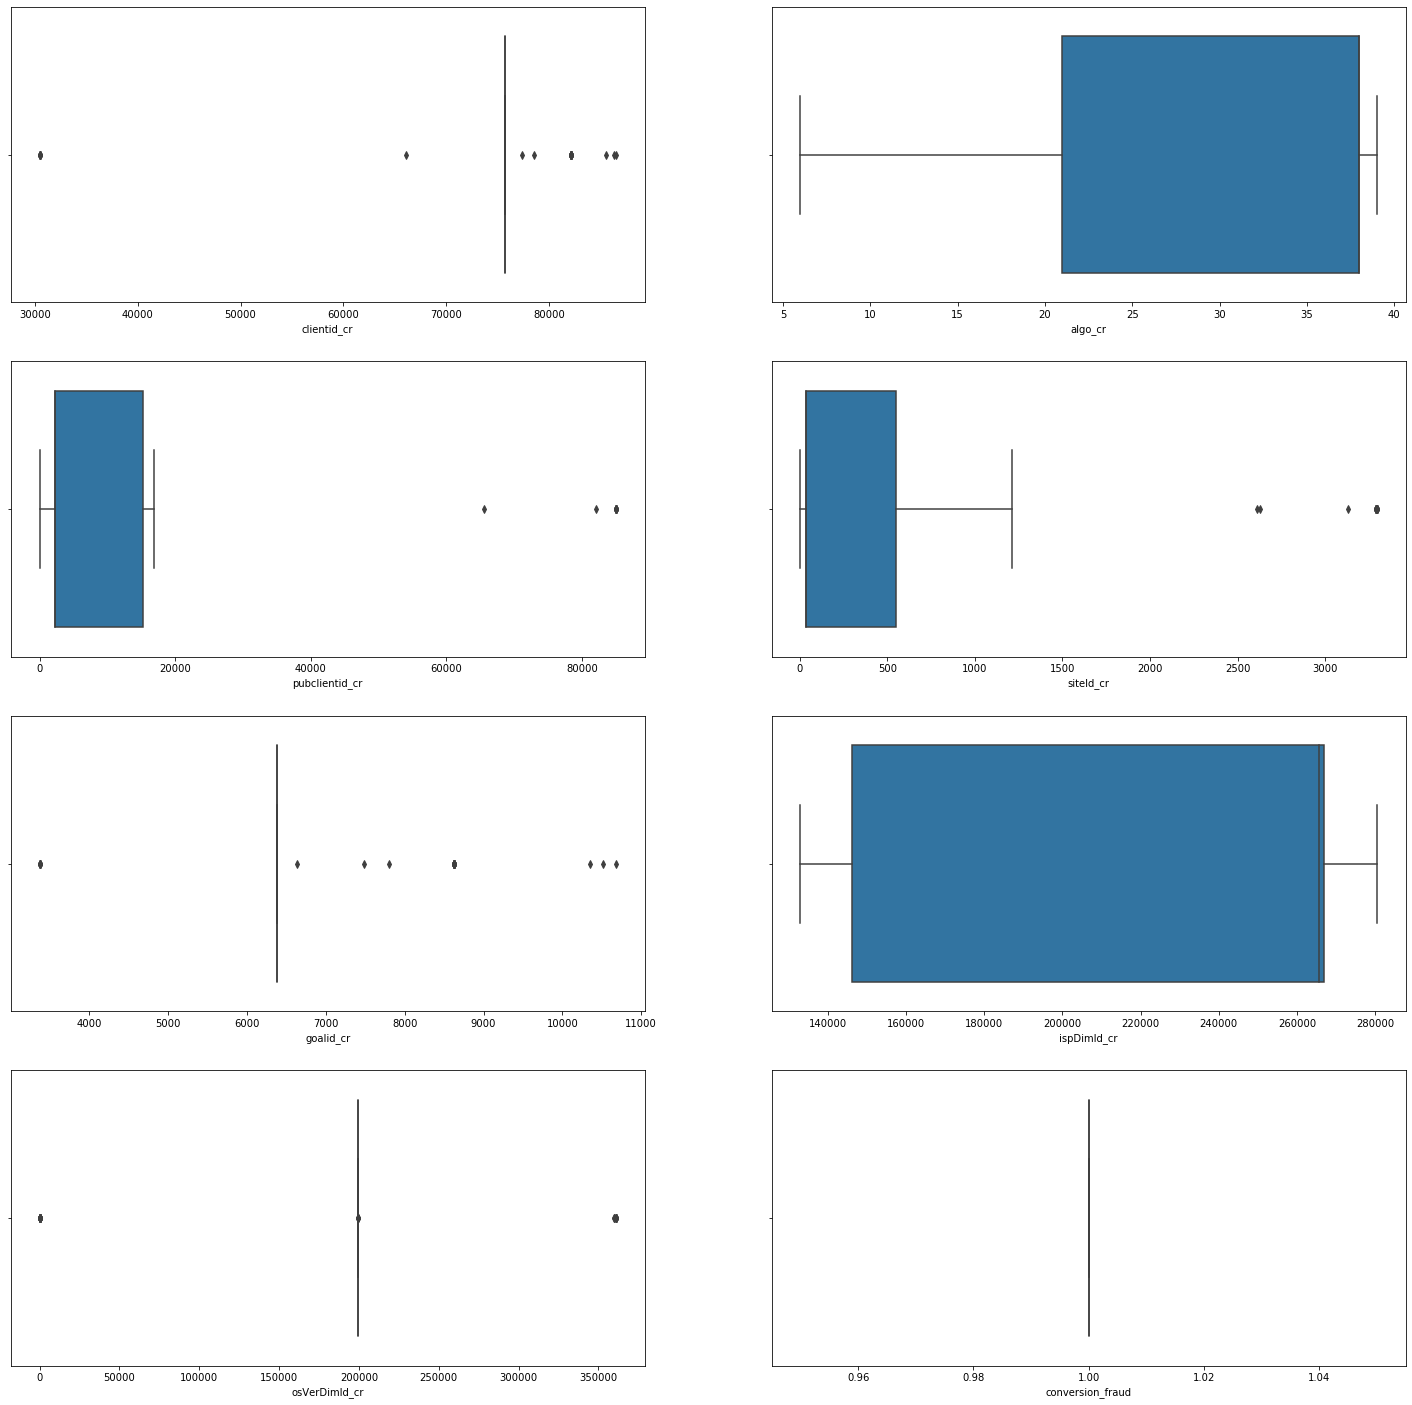

In [18]:
plt.figure(figsize=(25,25))
for n,var in enumerate(c[1:10]):
    plt.subplot(4,2,n+1)
    sns.boxplot(fraud[var])

In [26]:
normal1=normal.drop(columns=['Unnamed: 0'])
#normal['osVerDimId_cr'].value_counts()

In [33]:
df=pd.concat([fraud,normal1])

In [34]:
df.head()

,clientid_cr,algo_cr,pubclientid_cr,siteId_cr,goalid_cr,ispDimId_cr,osVerDimId_cr,conversion_fraud
0,75694,38,2320,34,6384,280429,199452,1
1,75694,38,15240,178,6384,136127,199452,1
2,75694,21,2320,34,6384,172725,199452,1
3,75694,38,2320,34,6384,136127,199452,1
4,30431,21,1,3296,3370,136127,360833,1


In [35]:
df.tail()

,clientid_cr,algo_cr,pubclientid_cr,siteId_cr,goalid_cr,ispDimId_cr,osVerDimId_cr,conversion_fraud
804,2139,18,16153,1043,722,0,360956,0
805,70491,6,76969,2923,4902,280429,359919,0
806,85572,1,15336,379,10346,136127,199522,0
807,75694,21,85030,3290,6384,0,199414,0
808,75694,38,85030,3290,6384,136127,199452,0


In [36]:
df.isnull().sum()

clientid_cr         0
algo_cr             0
pubclientid_cr      0
siteId_cr           0
goalid_cr           0
ispDimId_cr         0
osVerDimId_cr       0
conversion_fraud    0
dtype: int64

In [38]:
df.duplicated().sum()

198

In [40]:
normal1.duplicated().sum()

155

In [41]:
df1=df.drop_duplicates()

In [42]:
df1.shape

(724, 8)

In [43]:
df1.to_csv('train.csv')